In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataSet = pd.read_csv('nutrition.csv',\
                     usecols = [1,2, 3, 5,38,58,59,60])

dataSet.head()



name  serving_size  calories saturated_fat  protein  \
0       Cornstarch           100       381           NaN     0.26   
1     Nuts, pecans           100       691          6.2g     9.17   
2    Eggplant, raw           100        25           NaN     0.98   
3   Teff, uncooked           100       367          0.4g    13.30   
4  Sherbet, orange           100       144          1.2g     1.10   

  carbohydrate  fiber  sugers  
0      91.27 g  0.9 g    0.00  
1      13.86 g  9.6 g    3.97  
2       5.88 g  3.0 g    3.53  
3      73.13 g  8.0 g    1.84  
4      30.40 g  1.3 g   24.32

In [2]:
dataSet.shape

(8789, 8)

In [ ]:
#Below section is to cleanup the data frame. 

Let's Cleanup tha Data Frame

In [3]:
cols = ['name','serving_size', 'calories', 'protein','carbohydrate','sugers','saturated_fat','fiber']

data_food = dataSet.copy()
data_food.columns = cols
data_food = data_food.groupby(['name','serving_size','calories', 'protein','sugers']).mean().reset_index(drop=False)

data_food.head(10)

name  serving_size  calories  \
0               APPLEBEE'S, 9 oz house sirloin steak           100       189   
1                   APPLEBEE'S, Double Crunch Shrimp           100       323   
2                APPLEBEE'S, chicken tenders platter           100       297   
3                                  APPLEBEE'S, chili           100       157   
4                               APPLEBEE'S, coleslaw           100       120   
5                    APPLEBEE'S, crunchy onion rings           100       356   
6                           APPLEBEE'S, french fries           100       290   
7  APPLEBEE'S, from kid's menu, Macaroni & Cheese...           100       143   
8       APPLEBEE'S, from kids' menu, chicken tenders           100       296   
9                    APPLEBEE'S, hand battered, fish           100       202   

  protein   sugers  carbohydrate  fiber  
0    3.5g   0.00 g         26.85   0.00  
1    3.4g  25.96 g         12.31   1.07  
2    2.8g  17.98 g         19.62   0.36  
3    4.2g   4.57 g         12.56   2.27  
4    1.1g  13.17 g          0.79   9.33  
5    3.6g  40.17 g          4.58   4.48  
6    2.3g  39.50 g          3.31   0.00  
7    1.3g  21.08 g          5.01   3.70  
8    2.9g  18.36 g         19.25   0.39  
9    1.6g  16.65 g         13.23   0.51

In [ ]:
#A new column will be generated to see how healthy a food is based on their serving size and calorie.
#we will use abs() to convert negative value to positive value. The lower the value in Healty tab is, the better the food is.


Figure out if the food is healthy or not based on calories

In [4]:
healthyFood = abs((((data_food['serving_size'] - data_food['calories'])/data_food['serving_size'])*100))

data_food['Healthy_Calorie'] = healthyFood
data_food.head(15)

name  serving_size  calories  \
0                APPLEBEE'S, 9 oz house sirloin steak           100       189   
1                    APPLEBEE'S, Double Crunch Shrimp           100       323   
2                 APPLEBEE'S, chicken tenders platter           100       297   
3                                   APPLEBEE'S, chili           100       157   
4                                APPLEBEE'S, coleslaw           100       120   
5                     APPLEBEE'S, crunchy onion rings           100       356   
6                            APPLEBEE'S, french fries           100       290   
7   APPLEBEE'S, from kid's menu, Macaroni & Cheese...           100       143   
8        APPLEBEE'S, from kids' menu, chicken tenders           100       296   
9                     APPLEBEE'S, hand battered, fish           100       202   
10                      APPLEBEE'S, mozzarella sticks           100       316   
11               ARBY'S, classic, roast beef sandwich           100       242   
12  ARCHWAY Home Style Cookies, Chocolate Chip Ice...           100       497   
13       ARCHWAY Home Style Cookies, Coconut Macaroon           100       460   
14    ARCHWAY Home Style Cookies, Date Filled Oatmeal           100       400   

   protein   sugers  carbohydrate  fiber  Healthy_Calorie  
0     3.5g   0.00 g         26.85   0.00             89.0  
1     3.4g  25.96 g         12.31   1.07            223.0  
2     2.8g  17.98 g         19.62   0.36            197.0  
3     4.2g   4.57 g         12.56   2.27             57.0  
4     1.1g  13.17 g          0.79   9.33             20.0  
5     3.6g  40.17 g          4.58   4.48            256.0  
6     2.3g  39.50 g          3.31   0.00            190.0  
7     1.3g  21.08 g          5.01   3.70             43.0  
8     2.9g  18.36 g         19.25   0.39            196.0  
9     1.6g  16.65 g         13.23   0.51            102.0  
10    6.7g  22.87 g         14.87   2.80            216.0  
11    3.4g  22.21 g         15.17   3.84            142.0  
12    8.1g  65.02 g          4.28  34.06            397.0  
13     20g  61.23 g          3.02  45.16            360.0  
14    2.8g  68.16 g          4.67  34.27            300.0

In [ ]:
#Another column will create to show the carbohydrate comapred to serving.
#The lower the amount of carbohydrate is, the higher healthy the food is.


In [5]:
healthyFood = abs((((data_food['serving_size'] - data_food['carbohydrate'])/data_food['serving_size'])*100))

data_food['Healthy_Carbs'] = healthyFood
data_food.head(15)

name  serving_size  calories  \
0                APPLEBEE'S, 9 oz house sirloin steak           100       189   
1                    APPLEBEE'S, Double Crunch Shrimp           100       323   
2                 APPLEBEE'S, chicken tenders platter           100       297   
3                                   APPLEBEE'S, chili           100       157   
4                                APPLEBEE'S, coleslaw           100       120   
5                     APPLEBEE'S, crunchy onion rings           100       356   
6                            APPLEBEE'S, french fries           100       290   
7   APPLEBEE'S, from kid's menu, Macaroni & Cheese...           100       143   
8        APPLEBEE'S, from kids' menu, chicken tenders           100       296   
9                     APPLEBEE'S, hand battered, fish           100       202   
10                      APPLEBEE'S, mozzarella sticks           100       316   
11               ARBY'S, classic, roast beef sandwich           100       242   
12  ARCHWAY Home Style Cookies, Chocolate Chip Ice...           100       497   
13       ARCHWAY Home Style Cookies, Coconut Macaroon           100       460   
14    ARCHWAY Home Style Cookies, Date Filled Oatmeal           100       400   

   protein   sugers  carbohydrate  fiber  Healthy_Calorie  Healthy_Carbs  
0     3.5g   0.00 g         26.85   0.00             89.0          73.15  
1     3.4g  25.96 g         12.31   1.07            223.0          87.69  
2     2.8g  17.98 g         19.62   0.36            197.0          80.38  
3     4.2g   4.57 g         12.56   2.27             57.0          87.44  
4     1.1g  13.17 g          0.79   9.33             20.0          99.21  
5     3.6g  40.17 g          4.58   4.48            256.0          95.42  
6     2.3g  39.50 g          3.31   0.00            190.0          96.69  
7     1.3g  21.08 g          5.01   3.70             43.0          94.99  
8     2.9g  18.36 g         19.25   0.39            196.0          80.75  
9     1.6g  16.65 g         13.23   0.51            102.0          86.77  
10    6.7g  22.87 g         14.87   2.80            216.0          85.13  
11    3.4g  22.21 g         15.17   3.84            142.0          84.83  
12    8.1g  65.02 g          4.28  34.06            397.0          95.72  
13     20g  61.23 g          3.02  45.16            360.0          96.98  
14    2.8g  68.16 g          4.67  34.27            300.0          95.33

Scatter Plot to View Relation Between Calories and Carbs

C:\Users\13472\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13472\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


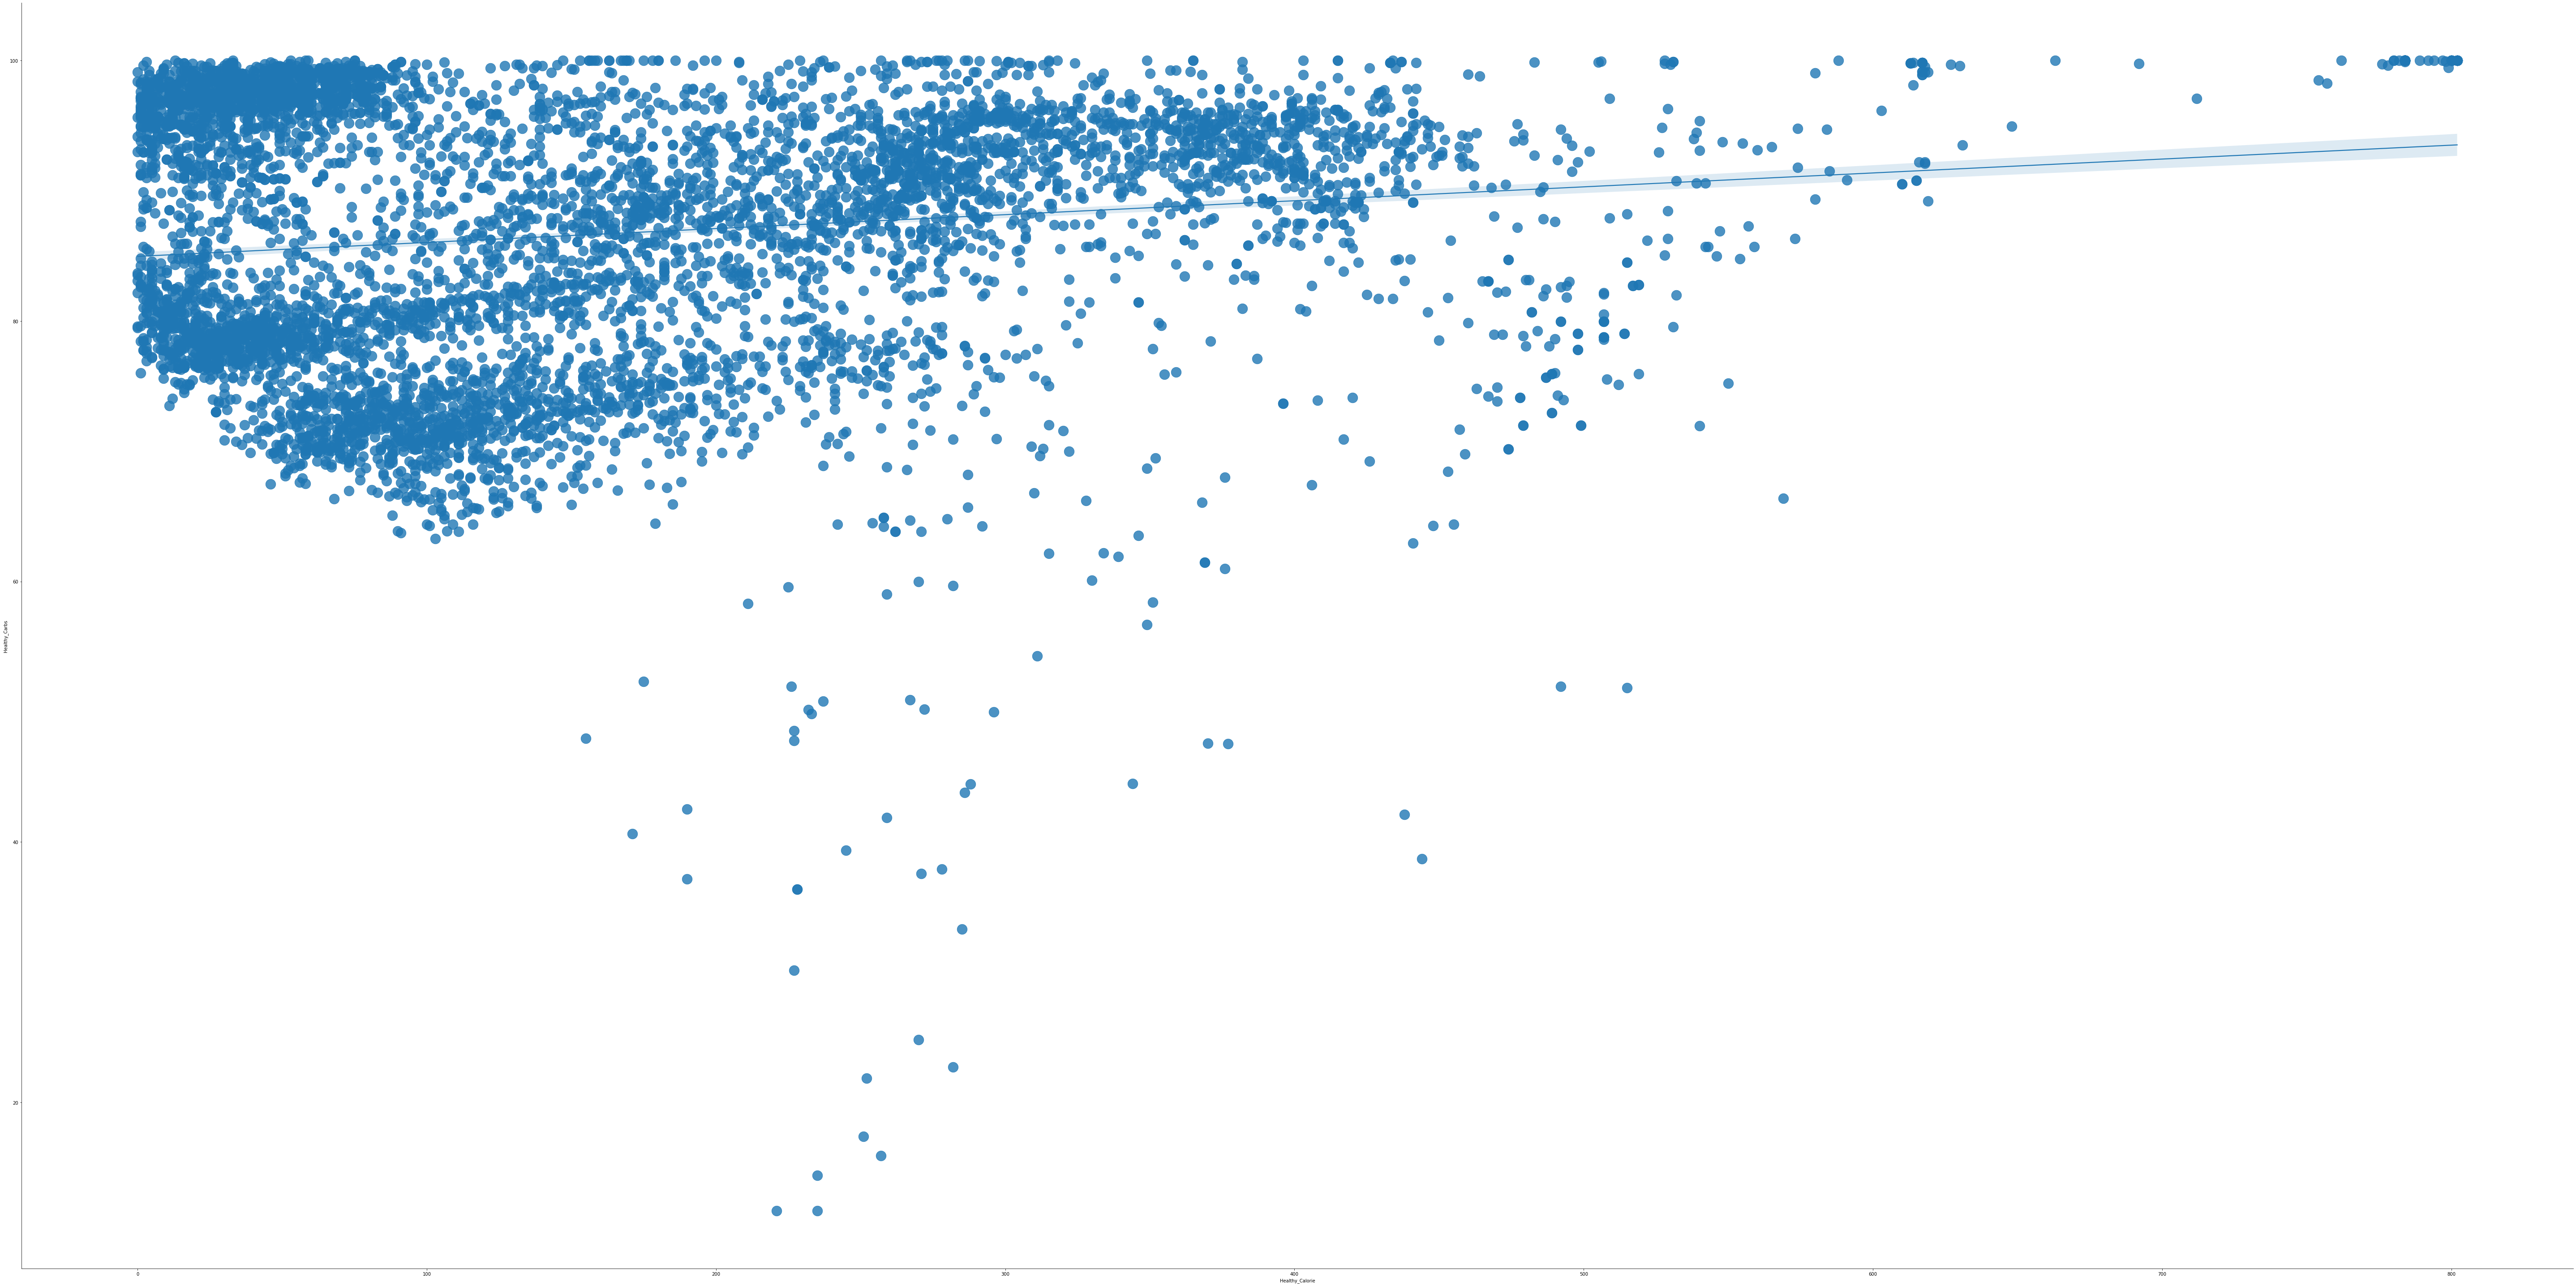

In [6]:
#leats create scatter plot to compare healthy calories vs healthy carbs

sns.lmplot('Healthy_Calorie', 'Healthy_Carbs', data=data_food, size=40, aspect=2, scatter_kws={"s": 500})

Scatter Plot to View Relation Between Calories and Sugers

C:\Users\13472\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13472\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


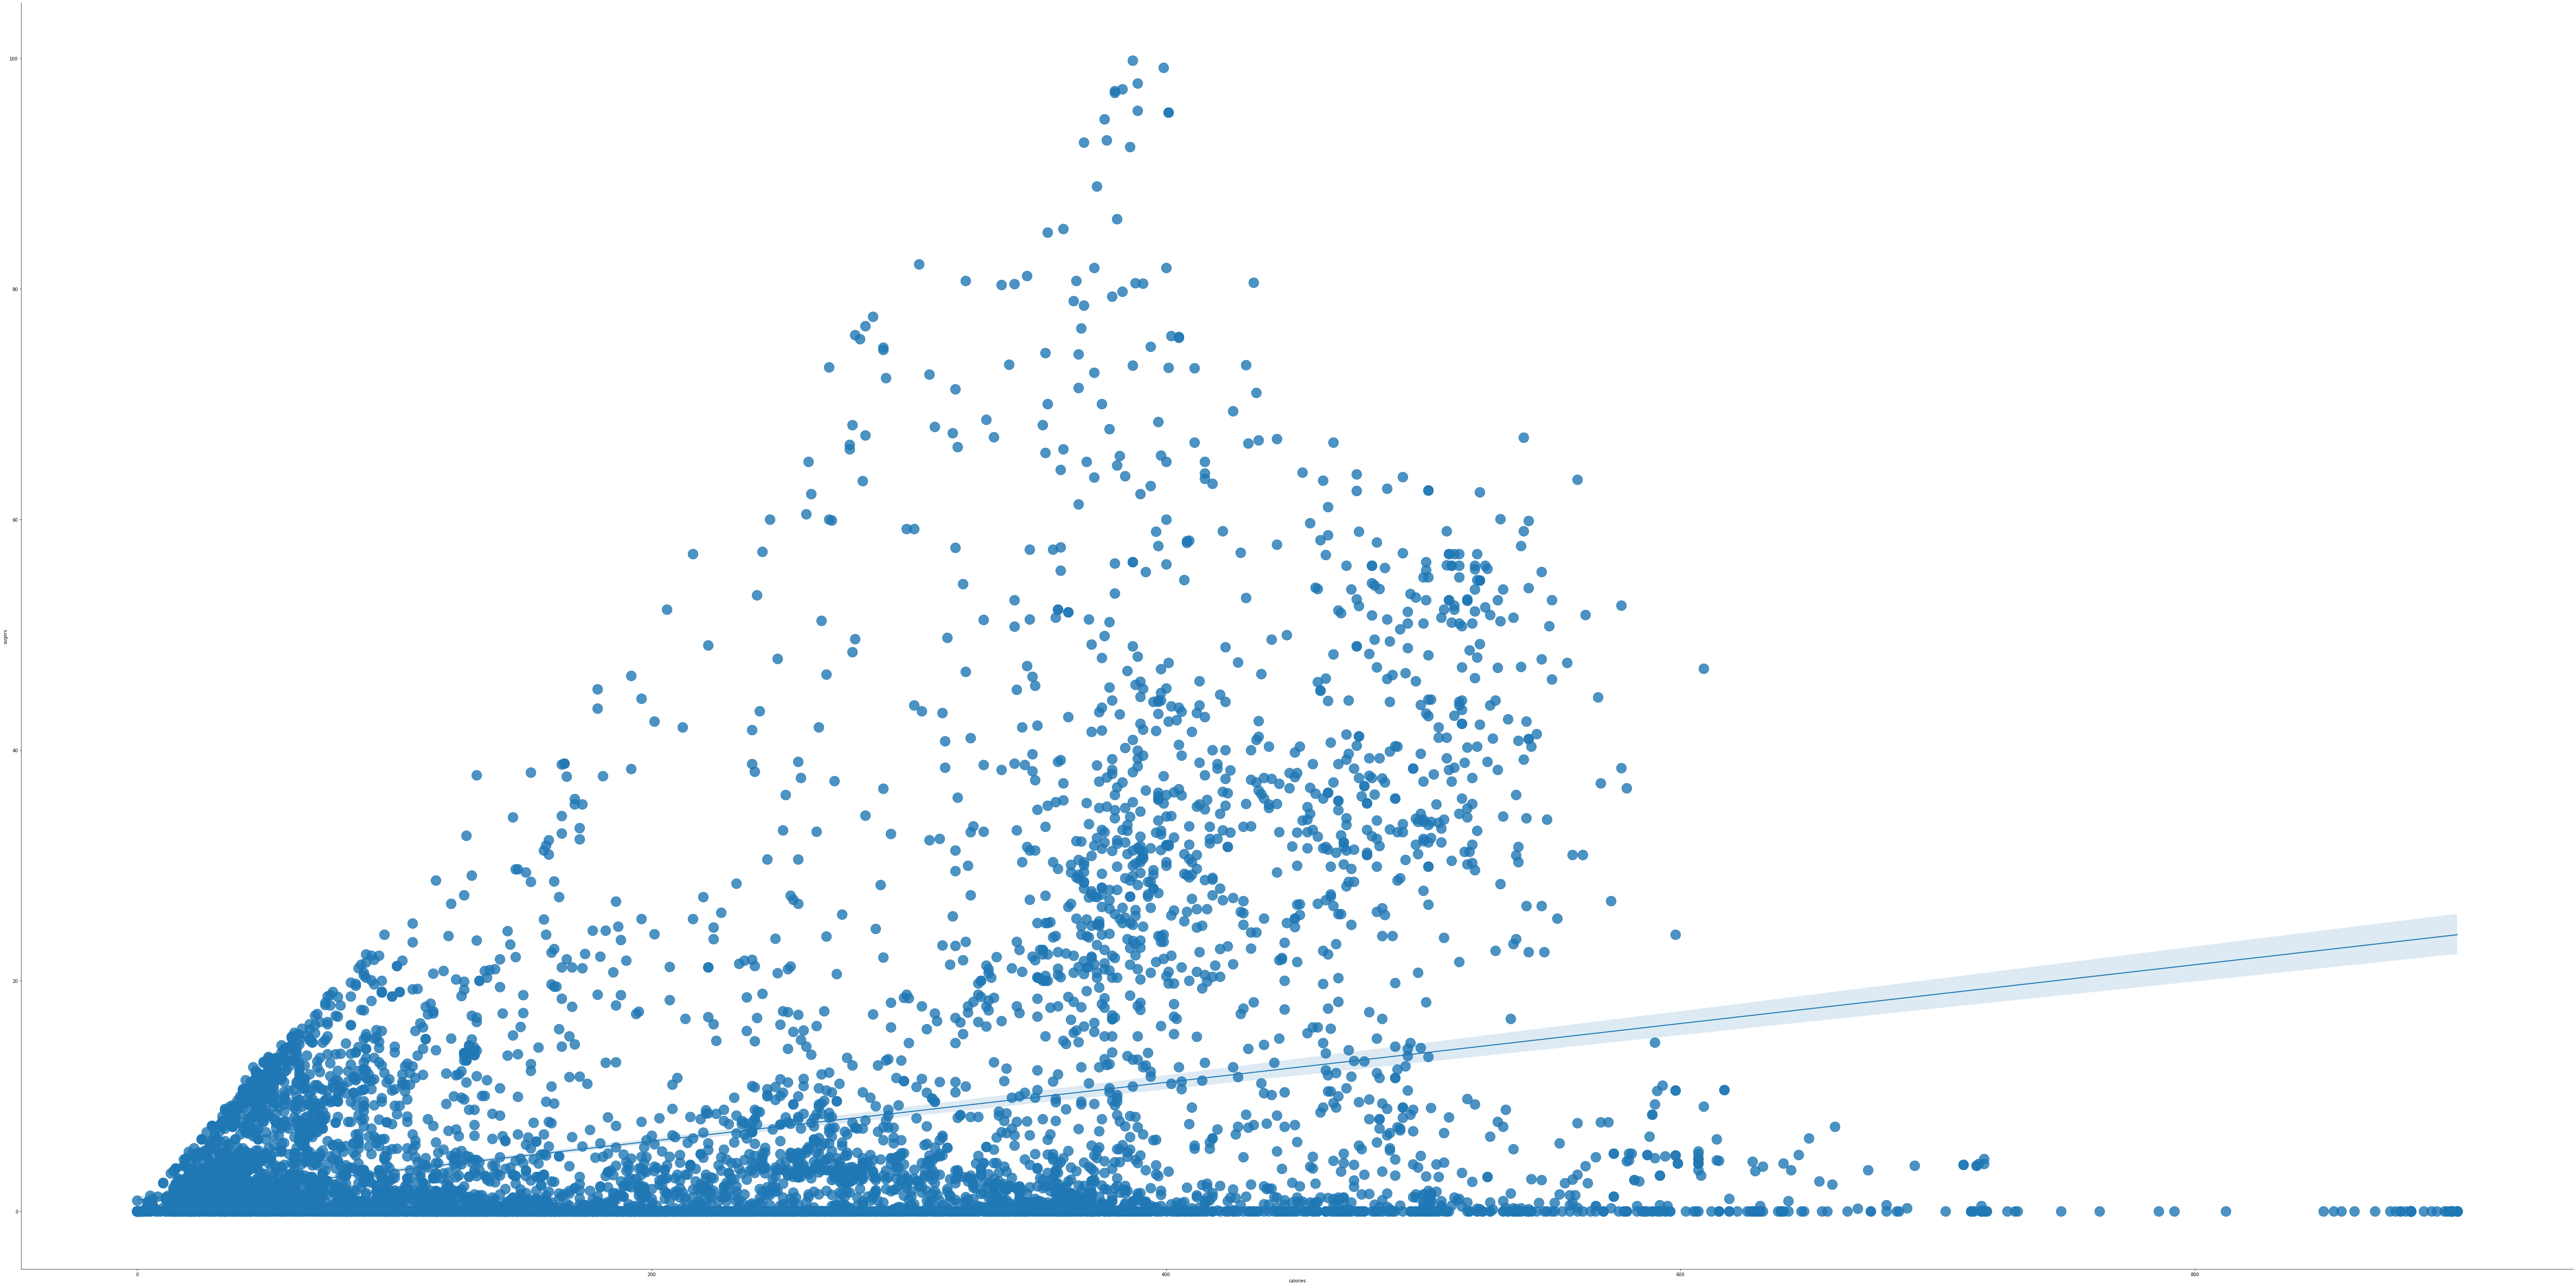

In [7]:
#leats create scatter plot to compare calories vs sugers

sns.lmplot('calories', 'sugers', data=dataSet, size=40, aspect=2, scatter_kws={"s": 500})

Scatter Plot to View Relation Between Healthy Carbs and Serving Size

C:\Users\13472\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13472\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


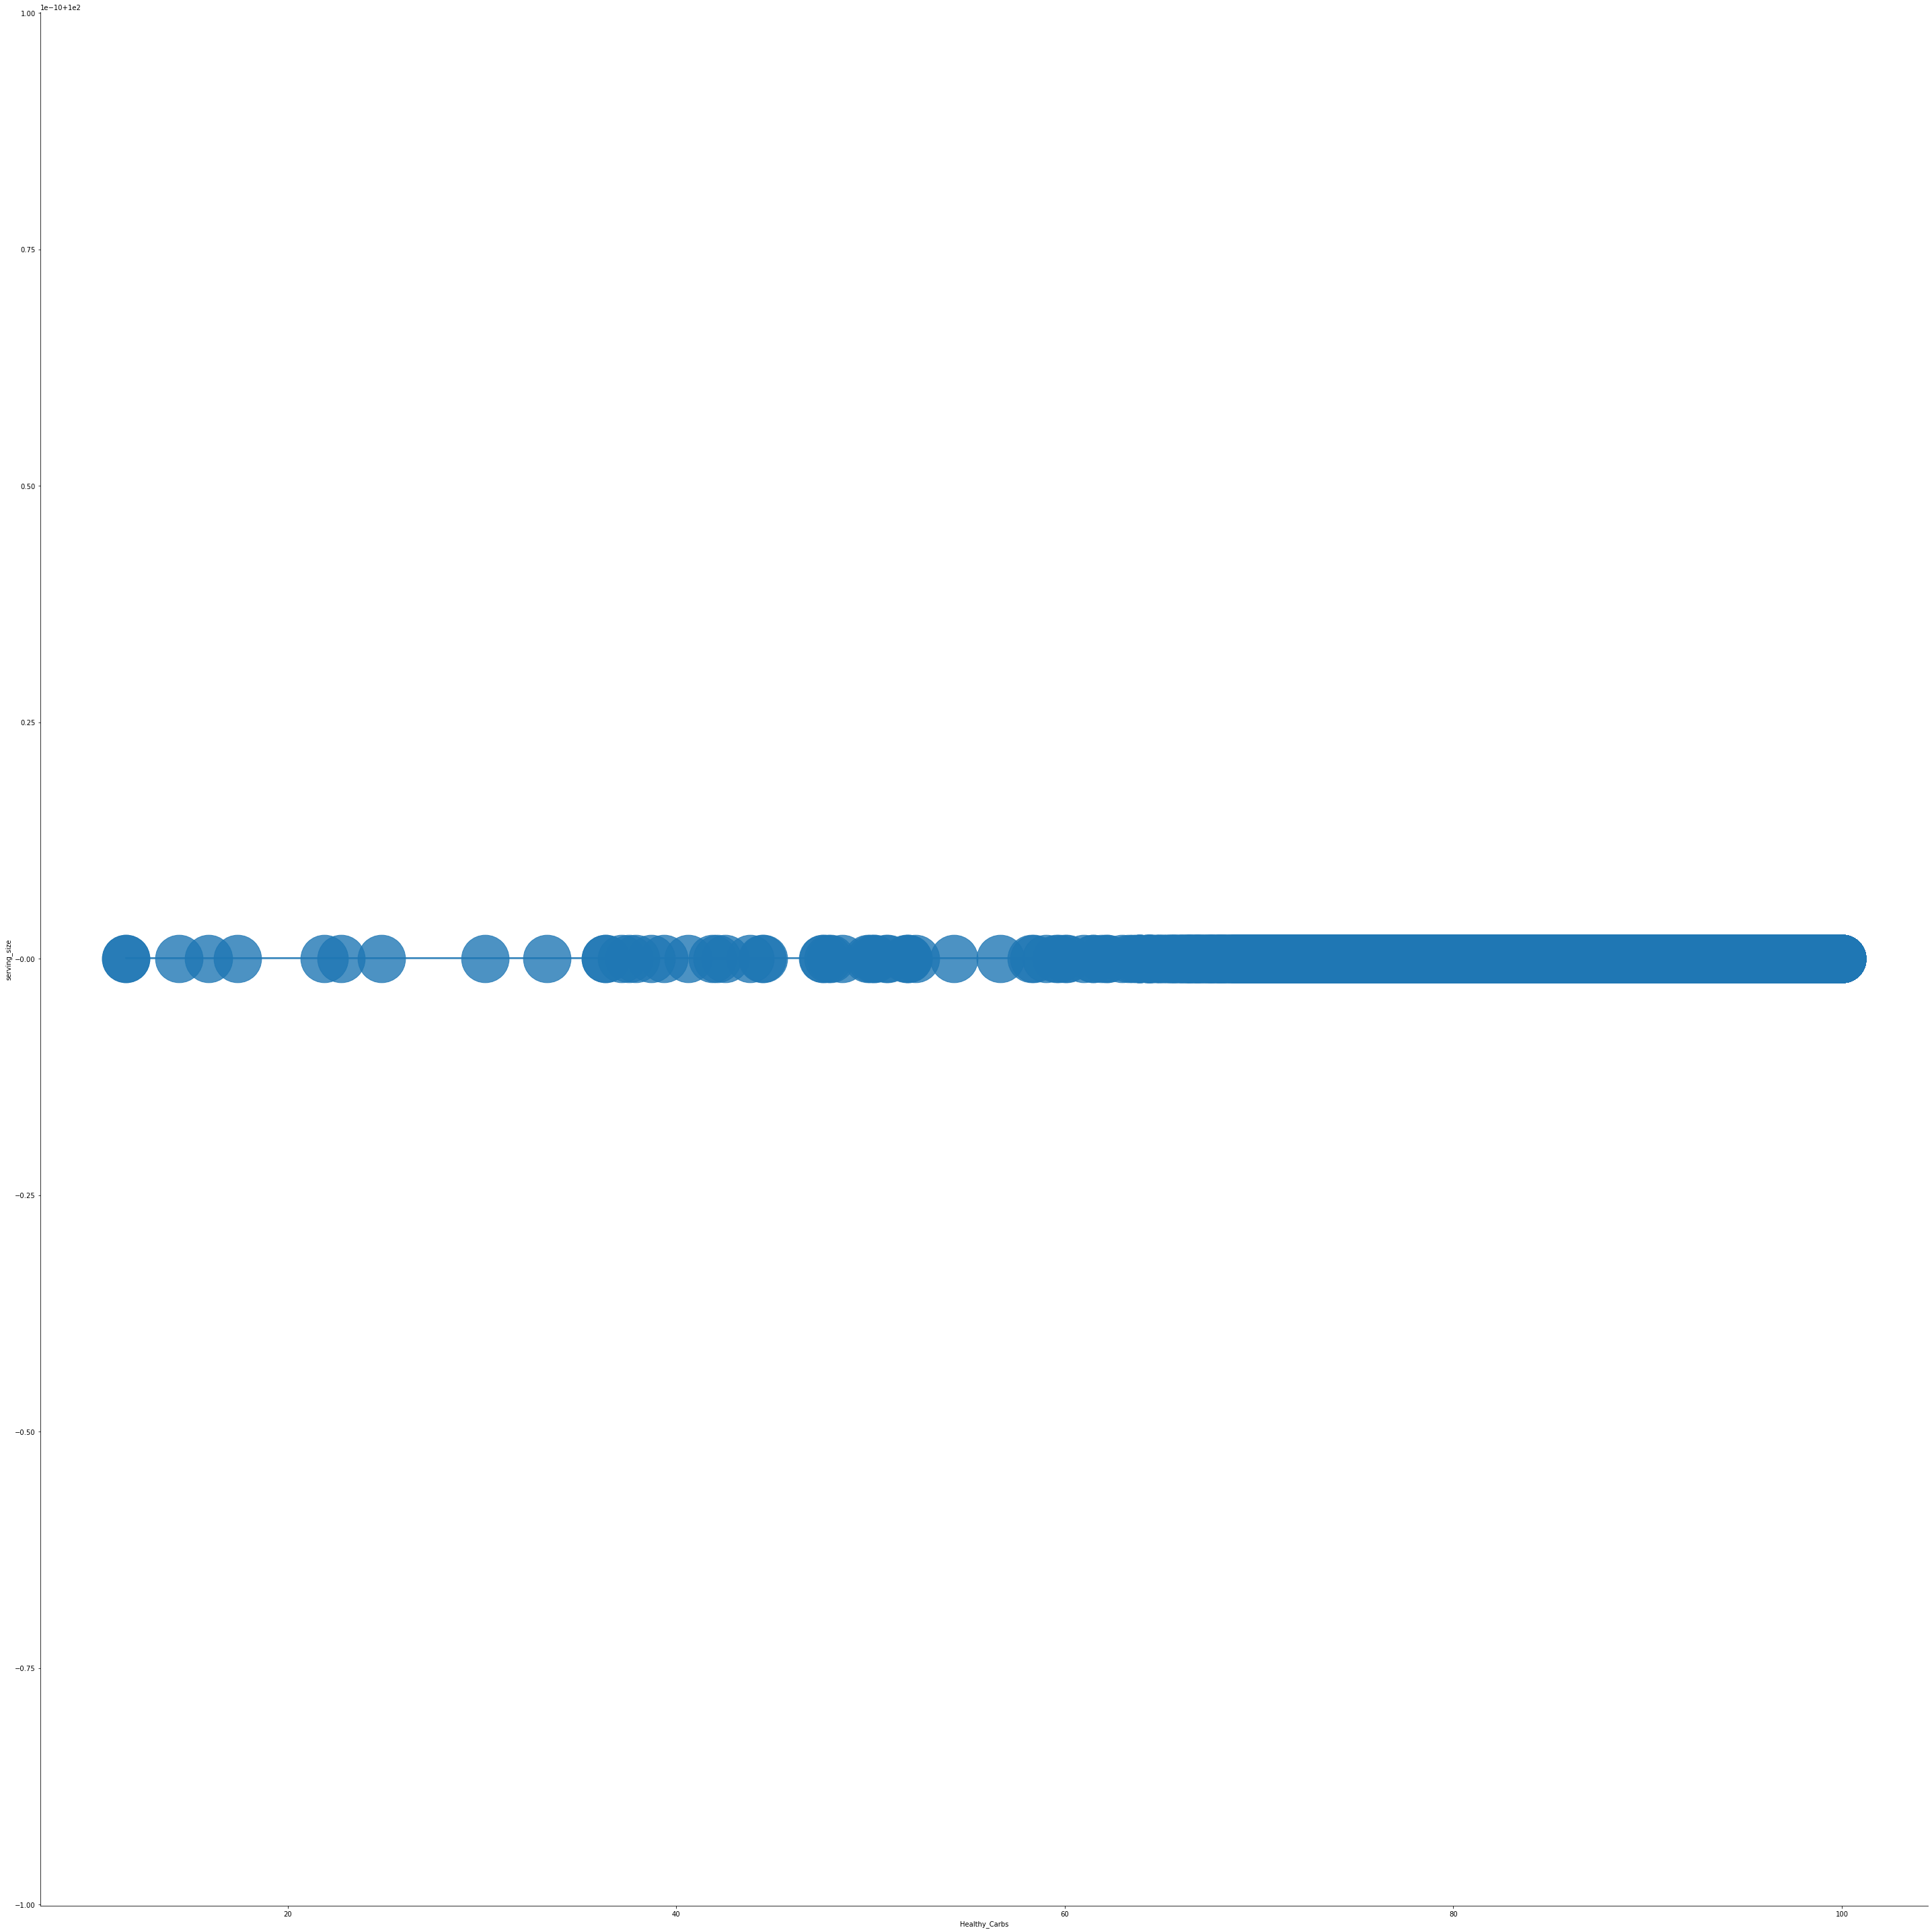

In [8]:
#another scatter plot for healthy carbs vs serving size

sns.lmplot( 'Healthy_Carbs', 'serving_size', data=data_food, size=40, aspect=1, scatter_kws={"s": 5000})

Scatter Plot to View Relation Between Healthy Calories and Serving Size

C:\Users\13472\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13472\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


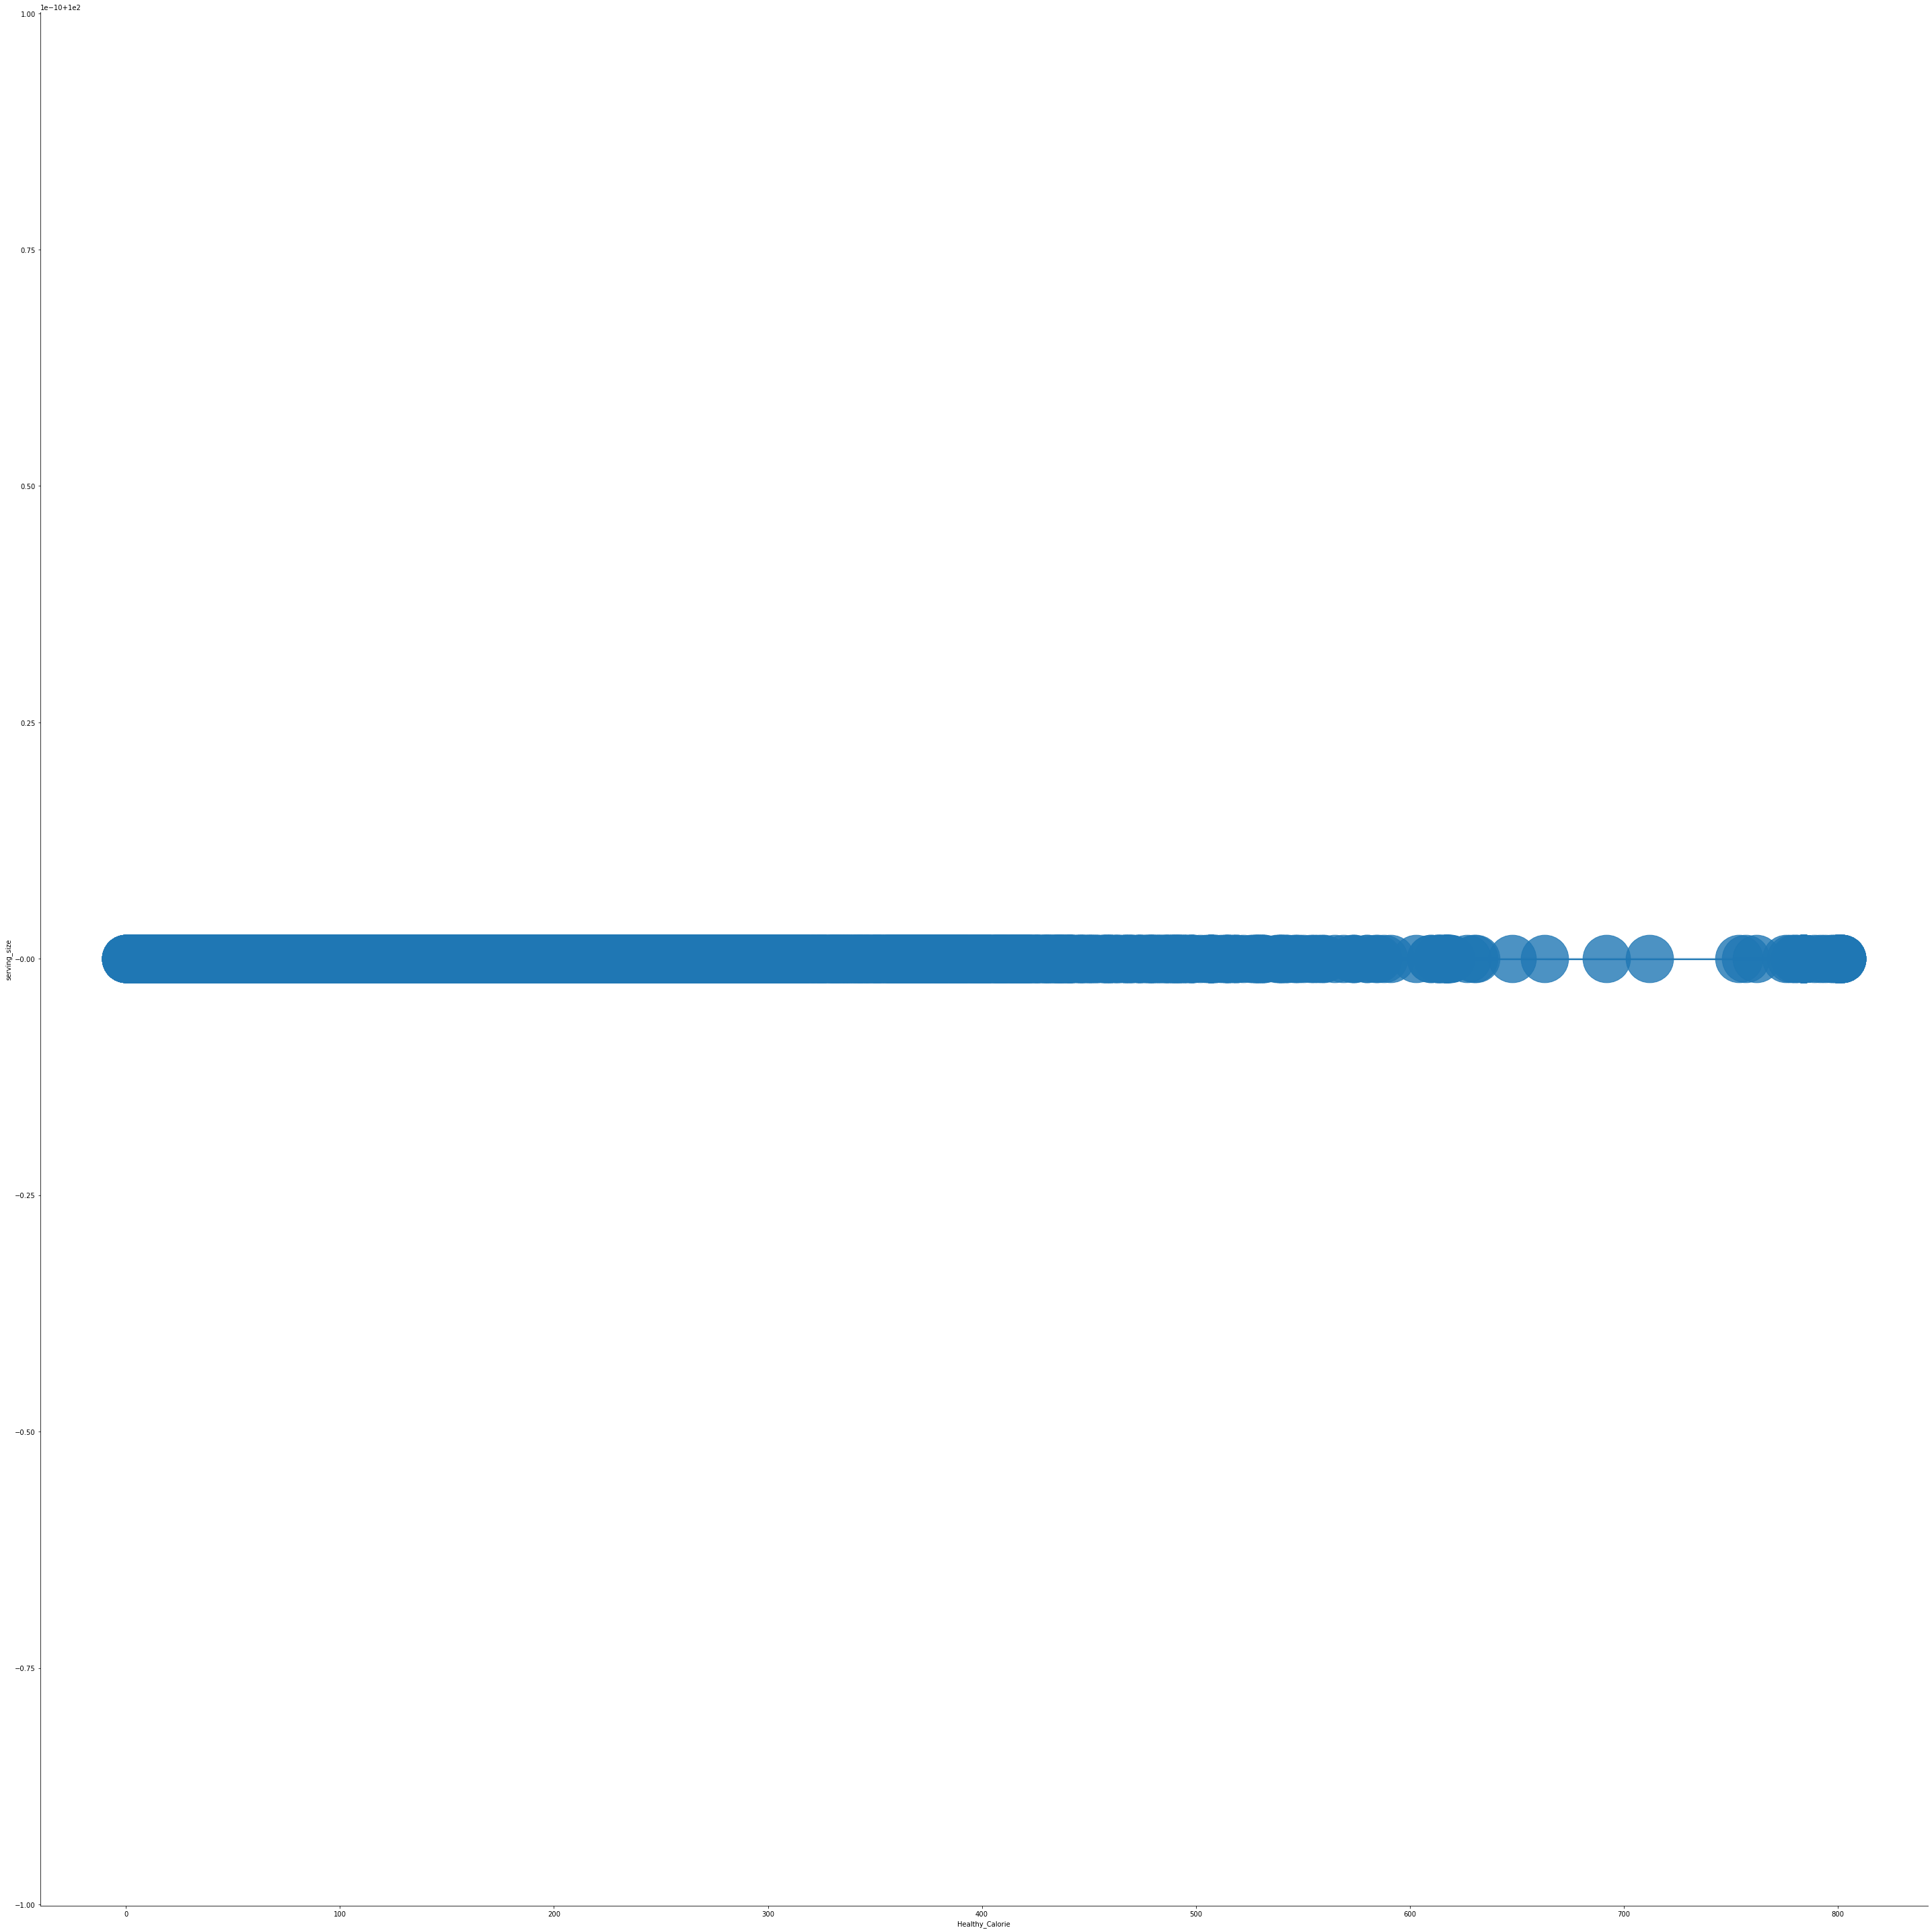

In [9]:
#another scatter plot for healthy calories vs serving size

sns.lmplot( 'Healthy_Calorie', 'serving_size', data=data_food, size=40, aspect=1, scatter_kws={"s": 5000})

Scatter Plot to View Relation Between Calories vs Carbohydrate

C:\Users\13472\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\13472\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


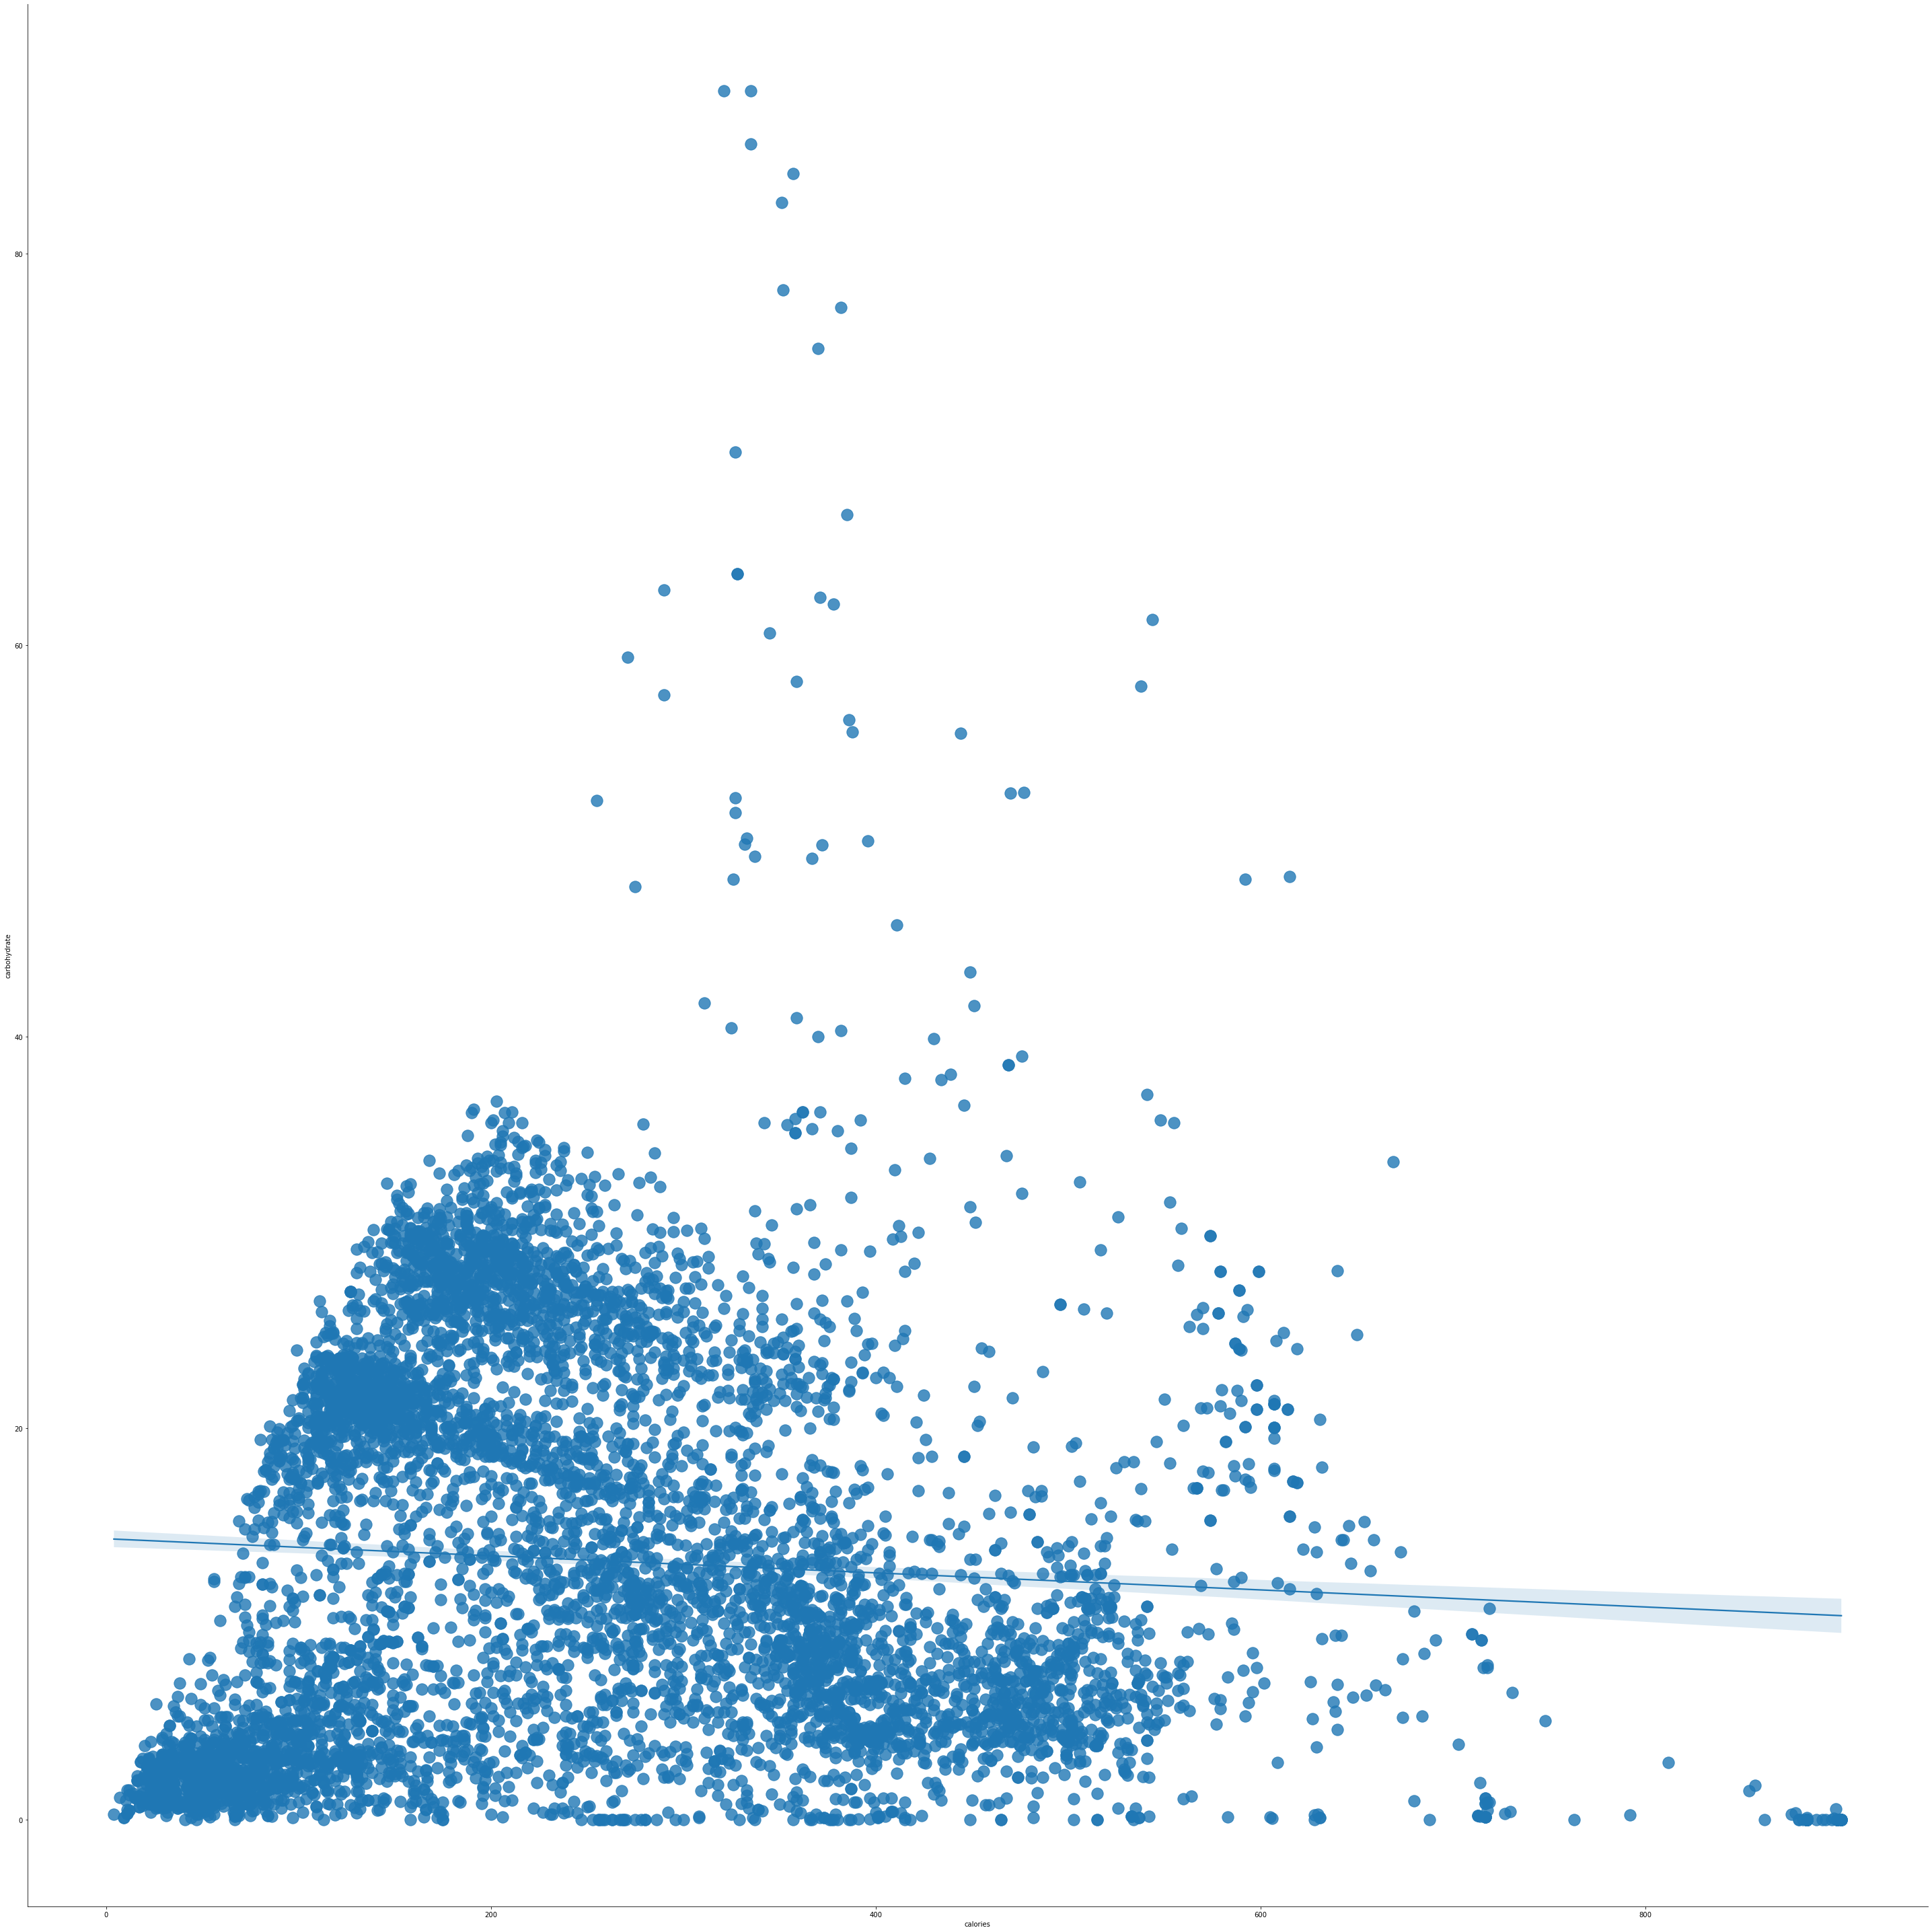

In [10]:
##another scatter plot for calories vs carbohydrate

sns.lmplot( 'calories', 'carbohydrate', data=data_food, size=40, aspect=1, scatter_kws={"s": 300})

Conclusion

From the avobe explanation it can be said that food with low calori, sugers and carbs are better than food with highers sugers, calories and carbs. However it can be varied from person to person because of health issues and medication. But overall food with less calories and sugers are good for everyone. 